In [7]:
#1 hot vectors hamming distance and k-nn
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [1]:
with open('embeddings/train_embed.pkl', 'rb') as f:
    x_train_enc = pickle.load(f)
with open('embeddings/val_embed.pkl', 'rb') as f:
    x_val_enc = pickle.load(f)
with open('embeddings/test_embed.pkl', 'rb') as f:
    x_test_enc = pickle.load(f)

#load the processed split data
def load_df(name):
    return pd.read_pickle('data/'+name+'.pkl')

[x_train, y_train, x_test, y_test, x_val, y_val] = map(load_df, ['x_train','y_train','x_test','y_test', 'x_val','y_val']) 

NameError: name 'pickle' is not defined

In [12]:
accs = []
for i in tqdm(range(1,50)):
    rf_classifier = RandomForestClassifier(max_depth=i, random_state=0, n_jobs=8, n_estimators=500)
    rf_classifier.fit(x_train_enc,y_train['sample_collection_site'])
    y_pred = rf_classifier.predict(x_val_enc)
    accs.append(accuracy_score(y_val['sample_collection_site'], y_pred))

100%|██████████| 49/49 [01:38<00:00,  2.01s/it]


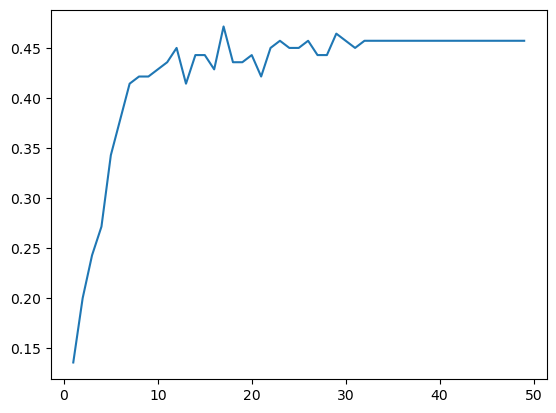

In [13]:
plt.plot(list(range(1,50)), accs)
plt.show()

In [17]:
rf_classifier = RandomForestClassifier(max_depth=30, random_state=0, n_jobs=8, n_estimators=500)
rf_classifier.fit(x_train_enc,y_train['sample_collection_site'])
val_score = rf_classifier.score(x_val_enc,y_val['sample_collection_site'])
val_score

0.45714285714285713

In [18]:
neigh = KNeighborsClassifier(n_neighbors=39)
neigh.fit(x_train_enc,y_train['sample_collection_site'])
val_score = neigh.score(x_val_enc,y_val['sample_collection_site'])
val_score

0.35714285714285715

In [24]:
#clf = make_pipeline(StandardScaler(),SVC(gamma='auto'))
clf = SVC(gamma='auto',kernel='linear')
clf.fit(x_train_enc,y_train['sample_collection_site'])
val_score = clf.score(x_val_enc,y_val['sample_collection_site'])
val_score

0.4642857142857143

In [25]:
y_hat_knn = neigh.predict(x_test_enc)
y_hat_svc = clf.predict(x_test_enc)
y_hat_rfc = rf_classifier.predict(x_test_enc)
y = y_test['sample_collection_site']

for y_pred,name in zip([y_hat_knn, y_hat_svc, y_hat_rfc],['knn','svc','rfc']):
    print('score for ', name)
    print(accuracy_score(y, y_pred))
    print(f1_score(y, y_pred, average="macro"))
    print(precision_score(y, y_pred, average="macro"))
    print(recall_score(y, y_pred, average="macro"))

score for  knn
0.3952380952380952
0.2568880321312834
0.29436228828174593
0.3013303684046718
score for  svc
0.37142857142857144
0.38073684249187345
0.3993826896787423
0.3967460816563467
score for  rfc
0.43333333333333335
0.26708419960887064
0.28698262566229904
0.30223086822448275


c:\Users\boop\anaconda3\envs\sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boop\anaconda3\envs\sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boop\anaconda3\envs\sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\boop\anaconda3\envs\sklearn\lib\site-packages\sklearn\met

Similar accuracy score reached with latent space representation and random forrest and SVC as with uncompressed data.